# Logistic Regression

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [45]:
data = pd.read_csv('data/transformed_data_num.csv', index_col=0)

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

#from sklearn.metrics import classification_report
#from sklearn.metrics import confusion_matrix

In [47]:
data.head()

,OutcomeType,AnimalType,SexuponOutcome,AgeuponOutcome,year,month,neutralized,ColorMix,BreedMix
AnimalID,,,,,,,,,
A671945,Return_to_owner,1,0,1.000000,2014,2,1.0,0,0
A656520,Euthanasia,0,1,1.000000,2013,10,1.0,0,0
A686464,Adoption,1,0,2.000000,2015,1,1.0,0,0
A683430,Transfer,0,0,0.057692,2014,7,0.0,0,0
A667013,Transfer,1,0,2.000000,2013,11,1.0,0,0


In [48]:
data.OutcomeType.value_counts()

Adoption           10769
Transfer            9422
Return_to_owner     4786
Euthanasia          1555
Died                 197
Name: OutcomeType, dtype: int64

In [49]:
data_ml = data
data_ml = data_ml.dropna()
data_ml["OutcomeType"] = (data_ml["OutcomeType"] == "Adoption").astype(np.int) # if adopted 1 else 0
data_ml.head()

<ipython-input-49-6738a0ad2c1c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ml["OutcomeType"] = (data_ml["OutcomeType"] == "Adoption").astype(np.int) # if adopted 1 else 0


,OutcomeType,AnimalType,SexuponOutcome,AgeuponOutcome,year,month,neutralized,ColorMix,BreedMix
AnimalID,,,,,,,,,
A671945,0,1,0,1.000000,2014,2,1.0,0,0
A656520,0,0,1,1.000000,2013,10,1.0,0,0
A686464,1,1,0,2.000000,2015,1,1.0,0,0
A683430,0,0,0,0.057692,2014,7,0.0,0,0
A667013,0,1,0,2.000000,2013,11,1.0,0,0


In [50]:
y = data_ml["OutcomeType"]
pred_cols = ["OutcomeType", "AnimalType", "SexuponOutcome", "AgeuponOutcome", "neutralized", "ColorMix", "BreedMix"]
x = data_ml[pred_cols]
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.33, random_state=42) # splitting in training & test data

<AxesSubplot:xlabel='OutcomeType', ylabel='count'>

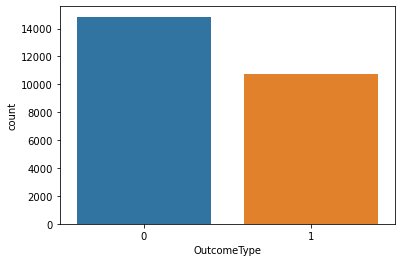

In [51]:
sns.countplot(x = "OutcomeType", data = data_ml) #pretty even distribution

In [52]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [53]:
pred = log_reg.predict(x_test)

In [54]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4956
           1       1.00      1.00      1.00      3499

    accuracy                           1.00      8455
   macro avg       1.00      1.00      1.00      8455
weighted avg       1.00      1.00      1.00      8455



## Confusion matrix

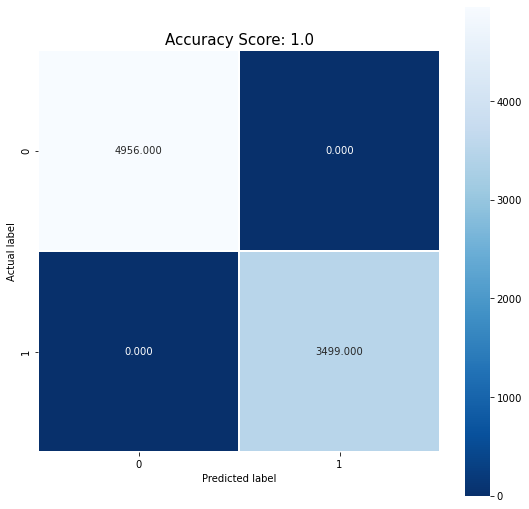

In [55]:
cm = confusion_matrix(y_test, pred)
score = log_reg.score(x_test, y_test)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

## ROC-curve

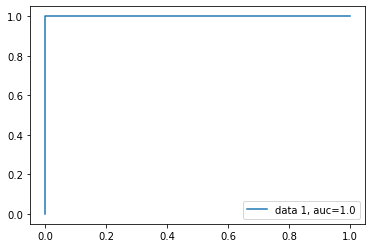

In [58]:
y_pred_proba = log_reg.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()